In [1]:
class MYLDA():
  import numpy as np
  def __computeWeights(self,data,b):
      #(zT.z)^^-1.zT.b
      return (np.linalg.inv((data.T).dot(data)).dot(data.T)).dot(b) 
  
  def __merge(self,x):
    #add new column values at end of X
    return np.column_stack((x,np.ones(x.shape[0])))

  def Z(self,x,y):
    data=self.__merge(x)
    Zs=[]
    for c in np.unique(y):#one vs all # for loop on each class to compute its equation vs The rest of classes
      curZ=data.copy()
      for i,vec in enumerate(curZ):
        if(y[i]!=c):#if label not equal the main class label
          curZ[i]=np.multiply(vec,-1)# feature vector and merged one multiply on -1
        else:
          curZ[i,-1]=1
      Zs.append(curZ)
    return Zs      

  def fit(self,x,y):
    b=np.ones(x.shape[0])
    Zs=self.Z(x,y)
    self.weights=[]
    self.weights.append([self.__computeWeights(i,b) for i in Zs])
    self.weights=np.array(self.weights)

  def predict(self,x):
    x=self.__merge(x)
    result=self.weights.dot(x.T)
    return np.squeeze(result)

  def score(self,x,y):
      result=self.predict(x)
      labels=self.__Wrongclassification(result,y)
      acc=self.__accuracy(labels)
      print("Accuracy ",acc)
      print(labels)
      return labels

  def __accuracy(self,labels):
    sum=0
    for i in labels:
      if(i!="wrong" and i!="New classification"and i!="Undetermined"):
        sum+=1
    return sum/len(labels) 

  def __Wrongclassification(self,result,y):
      classification=[]
      for i in range(0,result.shape[1]):
        flag=0
        label=-1
        for j in range(0,result.shape[0]):
          if(result[j,i]>0):
            flag+=1
            label=j
        if(flag==1 and y[i]==label):
          classification.append(label)
        elif(flag==1 and y[i]==label):
          classification.append("wrong")
        elif(flag==0):
          classification.append("New classification")     
        else:
          classification.append("Undetermined") 
      return classification        
  

In [2]:
from sklearn import datasets
import numpy as np
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.15, random_state=10)

In [3]:
lda = LDA()
lda.fit(X_train, y_train)
lda.score(X_test,y_test)

1.0

In [4]:
lda = MYLDA()
lda.fit(X_train, y_train)
y_labels=lda.score(X_test,y_test)

Accuracy  0.8695652173913043
[1, 2, 0, 'New classification', 0, 1, 1, 1, 0, 1, 'Undetermined', 2, 1, 0, 0, 2, 'Undetermined', 0, 0, 0, 2, 2, 2]


In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_pca = pca.transform(X_test)

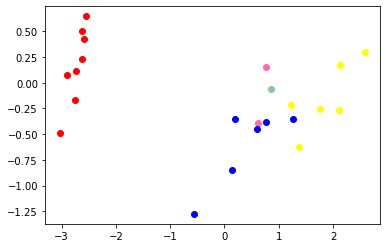

In [6]:
import matplotlib.pyplot as plt
import numpy as np

indices = np.array([X_pca[i,:] for i, x in enumerate(y_labels) if x == 'Undetermined'])
x = indices[:,0]
y = indices[:,1]
plt.scatter(x, y, color = 'hotpink')

indices = np.array([X_pca[i,:] for i, x in enumerate(y_labels) if x == 'New classification'])
x = indices[:,0]
y = indices[:,1]
plt.scatter(x, y, color = '#88c999')

indices = np.array([X_pca[i,:] for i, x in enumerate(y_labels) if x == 0])
x = indices[:,0]
y = indices[:,1]
plt.scatter(x, y, color = 'red')

indices = np.array([X_pca[i,:] for i, x in enumerate(y_labels) if x == 1])
x = indices[:,0]
y = indices[:,1]
plt.scatter(x, y, color = 'blue')

indices = np.array([X_pca[i,:] for i, x in enumerate(y_labels) if x == 2])
x = indices[:,0]
y = indices[:,1]
plt.scatter(x, y, color = 'yellow')

plt.show()